# 文生图-Titan Image Generator

同济子豪兄 2024-1-1

## 导入工具包

In [1]:
# Python 标准库
import json
import io

# AWS 服务
import boto3
from botocore.config import Config

# 图像处理
from PIL import Image
import base64

## 指定AWS Key

注册AWS IAM账号时生成的秘钥，需要换成你自己的

In [2]:
aws_access_key_id = 'XXXXXXX'
aws_secret_access_key = 'XXXXXXX'

## 指定AWS区域

默认使用`美国东部（弗吉尼亚北部）`，也就是`us-east-1`

In [3]:
aws_config = Config(
    region_name='us-east-1',
    proxies={},
)

## 创建Bedrock Client

In [4]:
bedrock_runtime = boto3.client(
    service_name='bedrock-runtime',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    config=aws_config,
)

/environment/miniconda3/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


## 选择文生图模型

In [5]:
model_id = 'amazon.titan-image-generator-v1'

## 文生图提示词（可以换成你自己的提示词）

In [6]:
prompt = 'A panda is playing basketball'

# prompt = 'A panda is eating KFC'

# prompt = 'green iguana'

# prompt = 'A girl is playing the piano, anime style'

## 调用Amazon Bedrock基础模型API，生成图像

文档：https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-titan-image.html

In [7]:
body = json.dumps({
    "taskType": "TEXT_IMAGE",
    "textToImageParams": {
        "text": prompt          # 文生图提示词
    },
    "imageGenerationConfig": {
        "numberOfImages": 1,
        "quality": "premium",   # 生成图像质量，可选 standard 和 premium
        "height": 1024,         # 生成图像高度
        "width": 1024,          # 生成图像宽度
        "cfgScale": 8.0,        # 生成的图像内容有多贴近提示词
        "seed": 0               # 随机种子，便于复现
    }
})

In [8]:
response = bedrock_runtime.invoke_model(
    body=body,
    modelId=model_id,
    accept="application/json",
    contentType="application/json",
)
response_body = json.loads(response.get("body").read())

## 对API生成的图像做解码，获得图像内容

In [9]:
base64_image = response_body.get("images")[0]
base64_bytes = base64_image.encode('ascii')
image_bytes = base64.b64decode(base64_bytes)
image = Image.open(io.BytesIO(image_bytes))

## 查看生成的图像内容

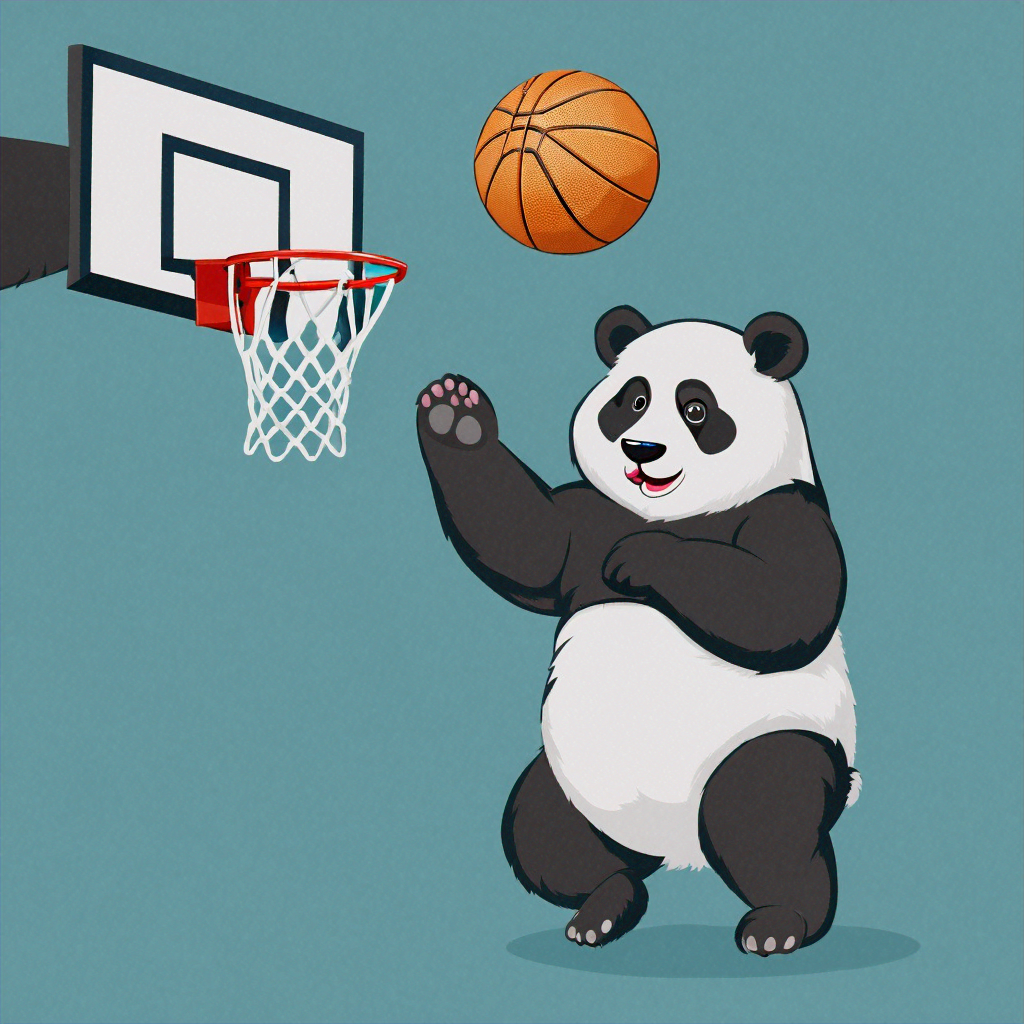

In [13]:
image

## 保存图像

In [14]:
image.save('outputs/C2_basketball.jpg')